In [280]:
# os package for set path
import os

# Pandas to read data from csv
import pandas as pd

# Train_test_split to split data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Standard sclar to traslate data in standard format, so processing become fast
from sklearn.preprocessing import StandardScaler

# keras Sequencial model and Dense to create Neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Mat plot lib to plot accuarcy and loss
import matplotlib
import matplotlib.pyplot as plt

In [281]:
# Read data from CSV file 
os.chdir('C:\\Users\\jaydipkumar.varu\\OneDrive - Accenture\\Data Science\\Python\\Breast-Cancer-Classifier-ANN-master')
data = pd.read_csv("breastCancer.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [282]:
# Data onservatiom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
0     699 non-null int64
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


- As per above data, it seems 7th column has mix data
- so we have to correct data and convert data into integer format

In [283]:
# Data pre-processing
df = pd.DataFrame(data)
df[6] = df[6].replace('?',0)
df[6] = df[6].astype(int)
df.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int32
7     int64
8     int64
9     int64
10    int64
dtype: object

In [284]:
# Calculate mean value of column 7
mean = int(df[6].mean())
mean

3

In [285]:
# Replace zero with mean value 
df[10] = df[10].replace(2,0).replace(4,1)
df[6] = df[6].replace(0,mean)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [286]:
# Define input and Output
X = df.iloc[:, 1:10]
y = df.iloc[:, 10]

In [287]:
# Split data in Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [288]:
# Apply standard scaler to data, so data can be processed with less timing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\jaydipkumar.varu\AppData\Local\Continuum\anaconda3\envs\Rasa\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jaydipkumar.varu\AppData\Local\Continuum\anaconda3\envs\Rasa\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jaydipkumar.varu\AppData\Local\Continuum\anaconda3\envs\Rasa\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [289]:
# building a linear stack of layers with the sequential model
# define input and fitst hidden layers
model = Sequential()

model.add(Dense(units = 20, activation = 'relu', input_dim=9))
model.add(Dropout(0.2))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [290]:
# Compile model with required parameters 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) 

In [300]:
# Fit training data
history = model.fit(X_train, y_train, batch_size = 128, epochs = 8, validation_data=(X_test, y_test))

Train on 559 samples, validate on 140 samples
Epoch 1/8
559/559 [==============================] - 0s 58us/step - loss: 0.0373 - acc: 0.9624 - val_loss: 0.0323 - val_acc: 0.9643
Epoch 2/8
559/559 [==============================] - 0s 48us/step - loss: 0.0357 - acc: 0.9642 - val_loss: 0.0313 - val_acc: 0.9714
Epoch 3/8
559/559 [==============================] - 0s 52us/step - loss: 0.0395 - acc: 0.9624 - val_loss: 0.0304 - val_acc: 0.9714
Epoch 4/8
559/559 [==============================] - 0s 47us/step - loss: 0.0348 - acc: 0.9535 - val_loss: 0.0297 - val_acc: 0.9714
Epoch 5/8
559/559 [==============================] - 0s 67us/step - loss: 0.0355 - acc: 0.9606 - val_loss: 0.0291 - val_acc: 0.9714
Epoch 6/8
559/559 [==============================] - ETA: 0s - loss: 0.0244 - acc: 0.984 - 0s 57us/step - loss: 0.0346 - acc: 0.9660 - val_loss: 0.0286 - val_acc: 0.9714
Epoch 7/8
559/559 [==============================] - 0s 73us/step - loss: 0.0329 - acc: 0.9642 - val_loss: 0.0281 - val_acc:

In [301]:
# Check accuracy score
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred]
accuracy_score(y_test,y_pred)

0.9714285714285714

In [302]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[82,  3],
       [ 1, 54]], dtype=int64)

In [303]:
# saving the model
save_dir = os.getcwd()
model_name = 'Bcancer.h5'
model_path = os.path.join(save_dir, model_name)

model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\jaydipkumar.varu\OneDrive - Accenture\Data Science\Python\Breast-Cancer-Classifier-ANN-master\Bcancer.h5 


In [304]:
history.params

{'batch_size': 128,
 'epochs': 8,
 'steps': None,
 'samples': 559,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

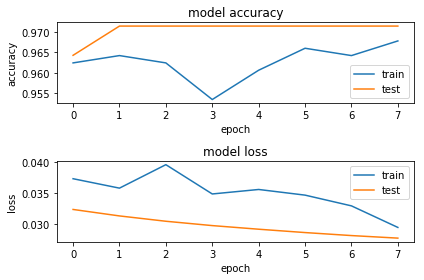

In [305]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
#fig